Componentes do grupo:

* Thiago Santos Amaral - RA 622100031
* Fabiana Santos De Oliveira – RA 622100337
* Nathan Goggi – RA 622100654



1.Importado Biblioteca



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


1.LEITURA DE DADOS COM PANDAS

*   Item da lista
*   Item da lista



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

PATH="/content/drive/MyDrive/uninove pos-graduação IA/python/Proposta de Avaliação da Disciplina/"

Mounted at /content/drive


In [ ]:
#pd.read_csv(PATH+'netflix_titles.csv')

In [ ]:
netflix_titles=pd.read_csv(PATH+'netflix_titles.csv')

1.MANIPULAÇAO E LIMPEZA DE DADOS 

*   Item da lista
*   Item da lista



In [ ]:
netflix_titles.drop(['show_id','cast','description'], axis=1, inplace=True)

In [ ]:
netflix_titles['date_added'] = pd.to_datetime(netflix_titles.date_added)
netflix_titles["adicionado_mes"] = pd.to_datetime(netflix_titles.date_added, format="%d/%m/%Y").dt.month
netflix_titles["adicionado_ano"] = pd.to_datetime(netflix_titles.date_added, format="%d/%m/%Y").dt.year


In [ ]:
netflix_titles.drop('date_added', axis=1, inplace=True)

Separdo os tempo das séries do tempo dos filmes

In [ ]:
netflix_titles['movie_duração_min'] = netflix_titles[netflix_titles['type'] == 'Movie']['duration'].apply(lambda x: str(x).split(' ')[0])
netflix_titles['TVShow_Temporadas'] = netflix_titles[netflix_titles['type'] == 'TV Show']['duration'].apply(lambda x: str(x).split(' ')[0])

In [ ]:
netflix_titles.drop('duration', axis=1, inplace=True)

In [ ]:
netflix_titles['quantis_do_ano'] = pd.cut(netflix_titles['adicionado_mes'], [0,4,7,10,netflix_titles['adicionado_mes'].max()], labels=['1','2','3','4'], right=False)
netflix_titles['adicionado_mes'].replace(
    {1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'},
     inplace=True)
netflix_titles['movie_duração_min'].replace({np.NaN : 0}, inplace=True)
netflix_titles['movie_duração_min'] = netflix_titles['movie_duração_min'].astype("float")
netflix_titles['movie_duração_min'] = pd.cut(netflix_titles['movie_duração_min'], [0,1,61,91,121, netflix_titles['movie_duração_min'].max()], 
                                  labels=['TV-SHOW', '1-60', '61-90', '91-120', '121-' + str(netflix_titles['movie_duração_min'].max())],
                                  right=False)
netflix_titles['TVShow_Temporadas'].fillna('Movie', inplace=True)

netflix_titles['adicionado_ano'].fillna(netflix_titles['release_year'], inplace=True)
netflix_titles['adicionado_ano'] = netflix_titles['adicionado_ano'].astype('int64')
netflix_titles['adicionado_mes'] = netflix_titles['adicionado_mes'].fillna(netflix_titles['adicionado_mes'].mode()[0])
netflix_titles['quantis_do_ano'] = netflix_titles['quantis_do_ano'].fillna(netflix_titles['quantis_do_ano'].mode()[0])


In [ ]:
def Verifica_informacao(dataframe, head=5):
    pd.set_option('display.max_columns', None)   
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', 170)

    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### describe #####################")
    print(dataframe.describe())

    print("##################### Info #####################")  
    print(dataframe.info())

    print("##################### Columns #####################")  
    print(dataframe.columns)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))

    print("##################### Nunique #####################")
    print(netflix_titles.nunique())

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    print("##################### Describe #####################")
    print(dataframe.describe().T)

Verifica_informacao(netflix_titles)

##################### Shape #####################
(8807, 12)
##################### describe #####################
       release_year  adicionado_ano
count   8807.000000     8807.000000
mean    2014.180198     2018.863291
std        8.819312        1.602696
min     1925.000000     2003.000000
25%     2013.000000     2018.000000
50%     2017.000000     2019.000000
75%     2019.000000     2020.000000
max     2021.000000     2021.000000
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type               8807 non-null   object  
 1   title              8807 non-null   object  
 2   director           6173 non-null   object  
 3   country            7976 non-null   object  
 4   release_year       8807 non-null   int64   
 5   rating             8803 non-null   object  
 6   listed_in

In [ ]:
def filtro_ano_lancamento(df,ano):
 return df[df['release_year'] == ano]
filtro_ano_lancamento(netflix_titles,1925)

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
4250,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,1925,TV-14,TV Shows,Dec,2018,TV-SHOW,1,3


In [ ]:
netflix_titles.groupby("adicionado_mes").count()

,type,title,director,country,release_year,rating,listed_in,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
adicionado_mes,,,,,,,,,,,
Apr,764,764,549,694,764,764,764,764,763,764,764
Aug,755,755,530,667,755,755,755,755,754,755,755
Dec,813,813,549,759,813,812,813,813,812,813,813
Feb,563,563,385,541,563,562,563,563,563,563,563
Jan,738,738,537,701,738,737,738,738,738,738,738
Jul,837,837,577,717,837,837,837,837,837,837,837
Jun,728,728,495,633,728,728,728,728,728,728,728
Mar,742,742,542,686,742,741,742,742,742,742,742
May,632,632,446,545,632,632,632,632,632,632,632


In [ ]:
netflix_titles.groupby("type").count()

,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
type,,,,,,,,,,,
Movie,6131,5943,5691,6131,6129,6131,6131,6131,6127,6131,6131
TV Show,2676,230,2285,2676,2674,2676,2676,2676,2676,2676,2676


In [ ]:
netflix_titles.groupby("quantis_do_ano").count()

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas
quantis_do_ano,,,,,,,,,,,
1,2043,2043,1464,1928,2043,2040,2043,2043,2043,2043,2043
2,2124,2124,1490,1872,2124,2124,2124,2124,2124,2123,2124
3,3175,3175,2176,2804,3175,3174,3175,3175,3175,3172,3175
4,1465,1465,1043,1372,1465,1465,1465,1465,1465,1465,1465


In [ ]:
netflix_titles.groupby("movie_duração_min").count()

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,TVShow_Temporadas,quantis_do_ano
movie_duração_min,,,,,,,,,,,
TV-SHOW,2676,2676,230,2285,2676,2674,2676,2676,2676,2676,2676
1-60,487,487,397,393,487,486,487,487,487,487,487
61-90,1503,1503,1451,1363,1503,1503,1503,1503,1503,1503,1503
91-120,2996,2996,2958,2857,2996,2995,2996,2996,2996,2996,2996
121-312.0,1141,1141,1134,1074,1141,1141,1141,1141,1141,1141,1141


In [ ]:
netflix_titles.groupby("TVShow_Temporadas").count()

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,quantis_do_ano
TVShow_Temporadas,,,,,,,,,,,
1,1793,1793,184,1458,1793,1791,1793,1793,1793,1793,1793
10,7,7,0,7,7,7,7,7,7,7,7
11,2,2,0,2,2,2,2,2,2,2,2
12,2,2,0,2,2,2,2,2,2,2,2
13,3,3,0,3,3,3,3,3,3,3,3
15,2,2,1,2,2,2,2,2,2,2,2
17,1,1,0,1,1,1,1,1,1,1,1
2,425,425,21,386,425,425,425,425,425,425,425
3,199,199,4,188,199,199,199,199,199,199,199


In [ ]:
netflix_titles.head(10)

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,Sep,2021,61-90,Movie,3
1,TV Show,Blood & Water,NaN,South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",Sep,2021,TV-SHOW,2,3
2,TV Show,Ganglands,Julien Leclercq,NaN,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",Sep,2021,TV-SHOW,1,3
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,"Docuseries, Reality TV",Sep,2021,TV-SHOW,1,3
4,TV Show,Kota Factory,NaN,India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",Sep,2021,TV-SHOW,2,3
5,TV Show,Midnight Mass,Mike Flanagan,NaN,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",Sep,2021,TV-SHOW,1,3
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",NaN,2021,PG,Children & Family Movies,Sep,2021,91-120,Movie,3
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies",Sep,2021,121-312.0,Movie,3
8,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,"British TV Shows, Reality TV",Sep,2021,TV-SHOW,9,3
9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,"Comedies, Dramas",Sep,2021,91-120,Movie,3


In [ ]:
netflix_titles.tail(10)

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
8797,TV Show,Zak Storm,NaN,"United States, France, South Korea, Indonesia",2016,TV-Y7,Kids' TV,Sep,2018,TV-SHOW,3,3
8798,Movie,Zed Plus,Chandra Prakash Dwivedi,India,2014,TV-MA,"Comedies, Dramas, International Movies",Dec,2019,121-312.0,Movie,3
8799,Movie,Zenda,Avadhoot Gupte,India,2009,TV-14,"Dramas, International Movies",Feb,2018,91-120,Movie,1
8800,TV Show,Zindagi Gulzar Hai,NaN,Pakistan,2012,TV-PG,"International TV Shows, Romantic TV Shows, TV ...",Dec,2016,TV-SHOW,1,3
8801,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,"Dramas, International Movies, Thrillers",Mar,2016,91-120,Movie,1
8802,Movie,Zodiac,David Fincher,United States,2007,R,"Cult Movies, Dramas, Thrillers",Nov,2019,121-312.0,Movie,4
8803,TV Show,Zombie Dumb,NaN,NaN,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies",Jul,2019,TV-SHOW,2,3
8804,Movie,Zombieland,Ruben Fleischer,United States,2009,R,"Comedies, Horror Movies",Nov,2019,61-90,Movie,4
8805,Movie,Zoom,Peter Hewitt,United States,2006,PG,"Children & Family Movies, Comedies",Jan,2020,61-90,Movie,1
8806,Movie,Zubaan,Mozez Singh,India,2015,TV-14,"Dramas, International Movies, Music & Musicals",Mar,2019,91-120,Movie,1


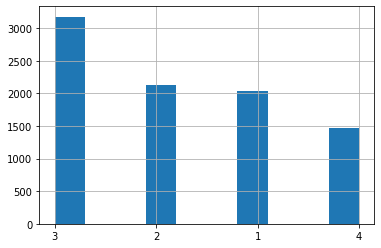

In [ ]:
netflix_titles['quantis_do_ano'].hist()

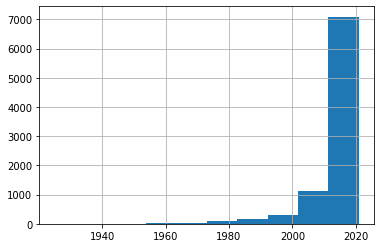

In [ ]:
netflix_titles['release_year'].hist()

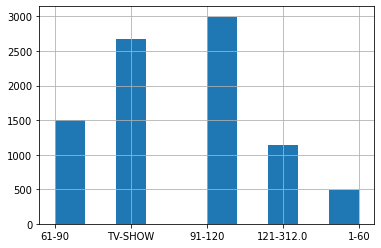

In [ ]:
netflix_titles['movie_duração_min'].hist()

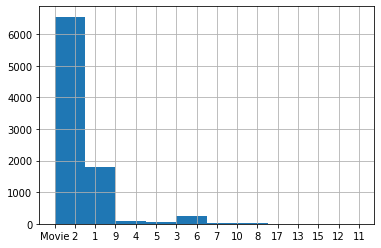

In [ ]:
netflix_titles['TVShow_Temporadas'].hist()

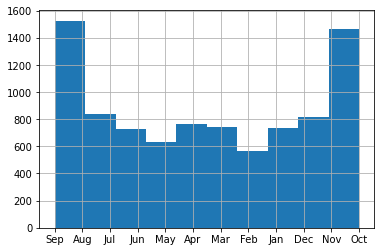

In [ ]:
netflix_titles['adicionado_mes'].hist()

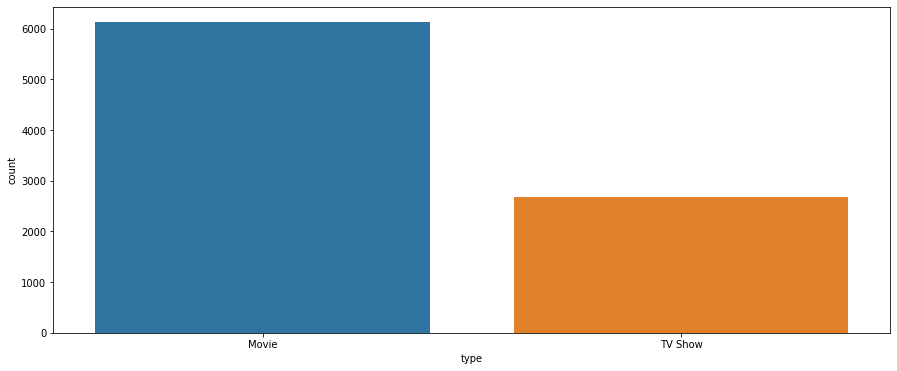

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data = netflix_titles ,x ='type')

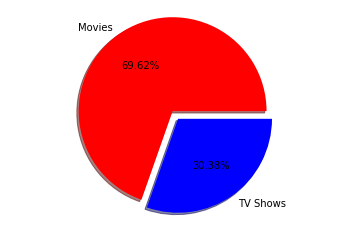

In [ ]:
label = 'Movies','TV Shows'
color = ['r','b']
explode = (0.1,0)
sizes = netflix_titles.type.value_counts()
plt.pie(sizes,explode = explode, colors= color, labels =label,shadow = True,autopct ='%1.2f%%')
plt.axis('equal');

Text(0.5, 1.0, 'Frequencia de Avaliação')

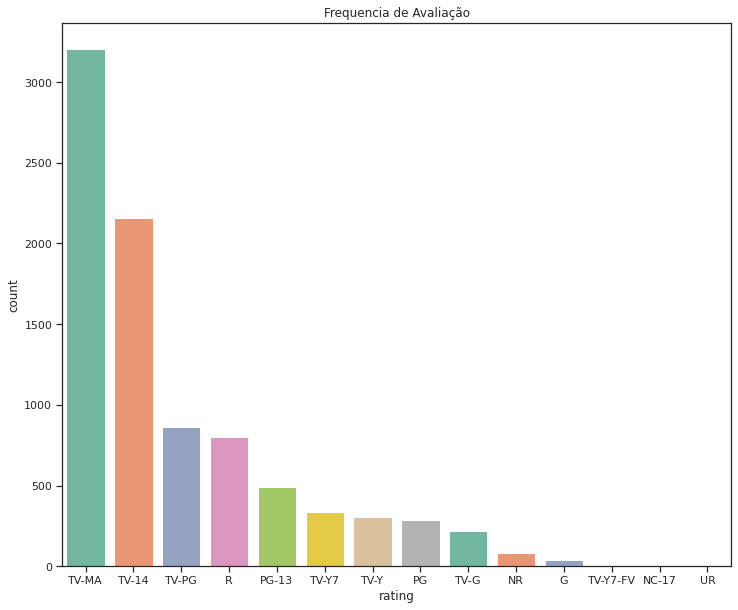

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="ticks")
ax = sns.countplot(x="rating", data=netflix_titles, palette="Set2", order=netflix_titles['rating'].value_counts().index[0:14])
plt.title('Frequencia de Avaliação')

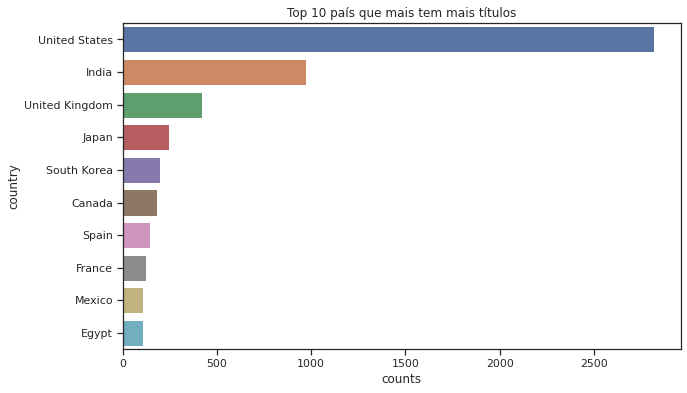

In [ ]:
plt.figure(figsize=(10,6))
top_countries = netflix_titles['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:10]
sns.barplot(data = top_countries, x= 'counts',y = 'country')
plt.title('Top 10 país que mais tem mais títulos');

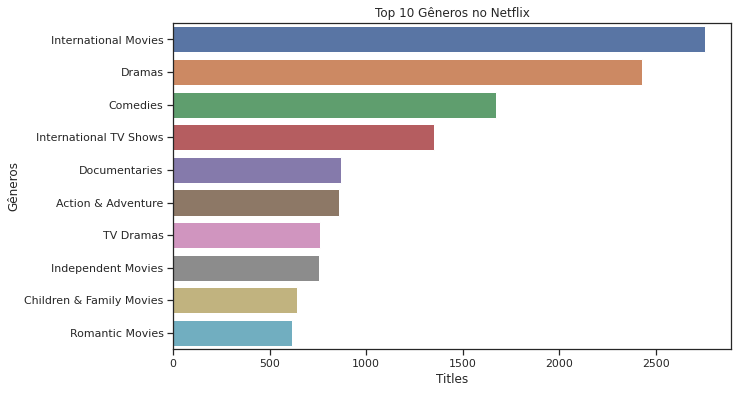

In [ ]:
filtered_genres = netflix_titles.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,6))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Gêneros no Netflix')
plt.xlabel('Titles')
plt.ylabel('Gêneros')
plt.show()

Pré-processamento dos dados para ser utilizada na aprendizagem supervisionad

In [ ]:
netflix_AS=pd.read_csv(PATH+'netflix_titles.csv')

In [ ]:
title_mapping = {"TV Show": 1, "Movie": 0}
netflix_AS['type'] = netflix_AS['type'].map(title_mapping)

In [ ]:
netflix_AS['duration'] = netflix_AS.duration.str.extract('([0-9]+)', expand=False)
netflix_AS['duration'] = pd.to_numeric(netflix_AS['duration'])
netflix_AS['duration'] = netflix_AS['duration'].fillna(0)


In [ ]:
netflix_AS['show_id'] = netflix_AS.show_id.str.extract('([0-9]+)', expand=False)
netflix_AS['show_id'] = pd.to_numeric(netflix_AS['show_id'])

In [ ]:
netflix_AS['rating'] = netflix_AS['rating'].astype(str)
r = {'TV-MA':1, 'R': 2,  'PG-13':3, 'TV-14':4, 'TV-PG':5 ,
     'NR':6 ,'TV-G':7 ,'TV-Y':8 , 'TV-Y7':9, 'PG':10, 'G':11,
     'NC-17': 12,  'TV-Y7-FV' :13, 'UR':14}
netflix_AS['rating'] = netflix_AS['rating'].map(r)
netflix_AS['rating'] = netflix_AS['rating'].fillna(1)
netflix_AS['rating'] = netflix_AS['rating'].astype(int)

In [ ]:
from datetime import datetime

netflix_AS['date_added'] = pd.to_datetime(netflix_AS['date_added'], errors= "coerce")
dateTimeObj = datetime.now()
netflix_AS['date_added'] = pd.DatetimeIndex(netflix_AS['date_added']).year
df=netflix_AS['date_added'].value_counts().idxmax()
netflix_AS['date_added'] = netflix_AS['date_added'].fillna(2019)
netflix_AS['date_added'] = netflix_AS['date_added'].astype(int)

In [ ]:
netflix_AS['genre']=netflix_AS.listed_in.str.extract(r'(Horror|Action & Adventure|Sci-Fi & Fantasy|Romantic|Comedies|Dramas|Sports|Trillers|Classic|cult|Children & Family|Science & Nature|Music)', expand=False)
g={"Horror": 1,"Action & Adventure": 2,"Sci-Fi & Fantasy": 3, "Romantic": 4, "Comedies": 5, "Dramas": 6, "Sports": 7, "Trillers": 8, "Classic": 9, "cult": 10, "Children & Family": 11, "Science & Nature": 12}
netflix_AS['genre'] = netflix_AS['genre'].map(g)
netflix_AS['genre'] = netflix_AS['genre'].fillna(0)
netflix_AS['genre'] = netflix_AS['genre'].astype(int)

In [ ]:
con=netflix_AS.country.unique()
asia=['Russian', 'China', 'India', 'Kazakhstan','Saudi Arabia', 'Iran', 'Mongolia', 'Indonesia',  'Pakistan',  'Turkey',  'Myanmar',  'Afghanistan',  'Yemen',  'Thailand', 'Turkmenistan', 'Uzbekistan', 'Iraq', 'Japan', 'Vietnam','Malaysia' ,'Oman', 'Philippines','Laos', 'Kyrgyzstan', 'Nepal','Tajikistan','North Korea',' South Korea', 'Jordan', 'Azerbaijan','syria', 'combodia' ,'Bangladash', 'United Arab Emirates','Georgia', 'Sri Lanka', 'Bhutan', 'Taiwan', 'Armenia', 'Israel kuwait', 'Timor-Leste', 'Qatar', 'Lebanon','Cyprus', 'Palestine','Brunei','Bahrain','Singapore', 'Maldives']
europe=['Germany','United Kingdom','France','Italy','Spain','Ukraine','Poland','Romania','Netherlands','Belgium','Czech Republic','Greece','Portugal','Sweden','Hungary','Belarus','Austria','Serbia','Switzerland','Bulgaria','Denmark','Finland','Slovakia','Norway','Ireland','Croatia','Moldova','Bosnia','Albania','Lithuania','North Macedonia','Slovenia','Latvia','Estonia','Montenegro','Luxembourg','Malta','Iceland','ndorra','Monaco','Liechtenstein','San Marino','Holy See']
Africa=['Ethiopia', 'Nigeria','Egypt','DR Congo','Tanzania','South Africa','Kenya','Uganda','Algeria','Sudan','Morocco','Angola','Mozambique','Ghana','Madagascar','Cameroon','Côte dIvoire','Niger','Burkina Faso','Mali','Malawi','Zambia','Senegal','Chad','Somalia','Zimbabwe','Guinea','Rwanda','Benin','Burundi','Tunisia','South Sudan','Togo','Sierra Leone','Libya','Congo','Liberia','Central African Republic','Mauritania','Eritrea','Namibia','Gambia','Botswana','Gabon','Lesotho','Guinea-Bissau','Equatorial Guinea','Mauritius','Eswatini','Djibouti','Co','Cabo Verde','Sao Tome','Seychelles']
Australia=['Micronesia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa','Solomon Islands', 'Tonga', 'Tuvalu','Vanuatu']
America=['Anguilla','United Kingdom','Barbuda','Argentina','Aruba','Netherlands','Bahamas','Barbados','Belize','Bermuda','Bolivia','Bonaire','Norway','Brazil','British Virgin Islands','Canada','Cayman Islands','Chile','Clipperton Island','Colombia','Costa Rica','Cuba','Curaçao','Dominica','Dominican Republic','Ecuador','El Salvador','Falkland Islands','French Guiana' ,'Greenland','Denmark','Grenada','Guadeloupe','Guatemala','Guyana','Haiti','Honduras','Jamaica','Martinique','Mexico','Montserrat','Navassa Island','United States','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Saba','Saint Barthélemy','Saint Kitts','Saint Lucia','Saint Martin','Saint Pierre','Saint Vincent','Sint Eustatius','Sint Maarten', 'South Georgia','South Sandwich Islands','Suriname','Trinidad','Tobago','Turks','Caicos Islands','Virgin Islands','United States of America','Uruguay','Venezuela']
netflix_AS['continenta']=netflix_AS.country.str.contains(r'(Russian|China|India|Kazakhstan|Saudi Arabia|Iran|Mongolia|Indonesia|Pakistan|Turkey|Myanmar|Afghanistan|Yemen|Thailand|Turkmenistan|Uzbekistan|Iraq|Japan|Vietnam|Malaysia|Oman|Philippines|Laos|Kyrgyzstan|Nepal|Tajikistan|North Korea|South Korea|Jordan|Azerbaijan|syria|combodia|Bangladash|United Arab Emirates|Georgia|Sri Lanka|Bhutan|Taiwan|Armenia|Israel|kuwait|Timor-Leste|Qatar|Lebanon|Cyprus|Palestine|Brunei|Bahrain|Singapore|Maldives)')
netflix_AS.loc[netflix_AS.continenta == True, "continenta"] = "Asia"
netflix_AS['continente']=netflix_AS.country.str.contains(r'(Germany|United Kingdom|France|Italy|Spain|Ukraine|Poland|Romania|Netherlands|Belgium|Czech Republic|Greece|Portugal|Sweden|Hungary|Belarus|Austria|Serbia|Switzerland|Bulgaria|Denmark|Finland|Slovakia|Norway|Ireland|Croatia|Moldova|Bosnia|Albania|Lithuania|North Macedonia|Slovenia|Latvia|Estonia|Montenegro|Luxembourg|Malta|Iceland|ndorra|Monaco|Liechtenstein|San Marino|Holy See)')
netflix_AS.loc[netflix_AS.continente == True, "continente"] = "Europe"
netflix_AS['continentaf']=netflix_AS.country.str.contains(r'(Ethiopia| Nigeria|Egypt|DR Congo|Tanzania|South Africa|Kenya|Uganda|Algeria|Sudan|Morocco|Angola|Mozambique|Ghana|Madagascar|Cameroon|Côte dIvoire|Niger|Burkina Faso|Mali|Malawi|Zambia|Senegal|Chad|Somalia|Zimbabwe|Guinea|Rwanda|Benin|Burundi|Tunisia|South Sudan|Togo|Sierra Leone|Libya|Congo|Liberia|Central African Republic|Mauritania|Eritrea|Namibia|Gambia|Botswana|Gabon|Lesotho|Guinea-Bissau|Equatorial Guinea|Mauritius|Eswatini|Djibouti|Co|Cabo Verde|Sao Tome|Seychelles)')
netflix_AS.loc[netflix_AS.continentaf == True, "continentaf"] = "Africa"
netflix_AS['continentau']=netflix_AS.country.str.contains(r'(Micronesia| Fiji|Kiribati|Marshall Islands|Nauru|New Zealand|Palau|Papua New Guinea|Samoa|Solomon Islands|Tonga|Tuvalu|Vanuatu)')
netflix_AS.loc[netflix_AS.continentau == True, "continentau"] = "Australia"
netflix_AS['continentam']=netflix_AS.country.str.contains(r'(Anguilla|United Kingdom|Barbuda|Argentina|Aruba|Netherlands|Bahamas|Barbados|Belize|Bermuda|Bolivia|Bonaire|Norway|Brazil|British Virgin Islands|Canada|Cayman Islands|Chile|Clipperton Island|Colombia|Costa Rica|Cuba|Curaçao|Dominica|Dominican Republic|Ecuador|El Salvador|Falkland Islands|French Guiana |Greenland|Denmark|Grenada|Guadeloupe|Guatemala|Guyana|Haiti|Honduras|Jamaica|Martinique|Mexico|Montserrat|Navassa Island|United States|Nicaragua|Panama|Paraguay|Peru|Puerto Rico|Saba|Saint Barthélemy|Saint Kitts|Saint Lucia|Saint Martin|Saint Pierre|Saint Vincent|Sint Eustatius|Sint Maarten| South Georgia|South Sandwich Islands|Suriname|Trinidad|Tobago|Turks|Caicos Islands|Virgin Islands|United States of America|Uruguay|Venezuela)')
netflix_AS.loc[netflix_AS.continentam == True, "continentam"] = "America"

contin = {'Asia':1, 'Europe': 2,  'Africa':3, 'Australia':4, 'America':5}
netflix_AS['continenta'] = netflix_AS['continenta'].map(contin)
netflix_AS['continente'] = netflix_AS['continente'].map(contin)
netflix_AS['continentaf'] = netflix_AS['continentaf'].map(contin)
netflix_AS['continentau'] = netflix_AS['continentau'].map(contin)
netflix_AS['continentam'] = netflix_AS['continentam'].map(contin)
netflix_AS['continenta'] = netflix_AS['continenta'].fillna(0)
netflix_AS['continente'] = netflix_AS['continente'].fillna(0)
netflix_AS['continentaf'] = netflix_AS['continentaf'].fillna(0)
netflix_AS['continentau'] = netflix_AS['continentau'].fillna(0)
netflix_AS['continentam'] = netflix_AS['continentam'].fillna(0)
netflix_AS['continent'] = netflix_AS['continenta']+netflix_AS['continente']+netflix_AS['continentaf']+netflix_AS['continentau']+netflix_AS['continentam']
netflix_AS['continent'] = netflix_AS['continent'].astype(int)
netflix_AS.loc[(netflix_AS.continent>5),'continent']=5
netflix_AS['continent'] = netflix_AS['continenta']+netflix_AS['continente']+netflix_AS['continentaf']+netflix_AS['continentau']+netflix_AS['continentam']
netflix_AS['continent'] = netflix_AS['continent'].astype(int)
netflix_AS.loc[(netflix_AS.continent>5),'continent']=5
netflix_AS = netflix_AS.drop(['continenta','continente','continentaf', 'continentau', 'continentam'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [ ]:
netflix_AS = netflix_AS.drop(['title','country','cast','director', 'listed_in', 'description'], axis=1)


In [ ]:
Verifica_informacao(netflix_AS)


##################### Shape #####################
(8807, 8)
##################### describe #####################
           show_id         type   date_added  release_year       rating     duration        genre    continent
count  8807.000000  8807.000000  8807.000000   8807.000000  8807.000000  8807.000000  8807.000000  8807.000000
mean   4404.000000     0.303849  2018.872034   2014.180198     3.428636    69.823095     3.917566     3.234359
std    2542.506244     0.459944     1.573355      8.819312     2.598959    50.822520     3.276496     2.046537
min       1.000000     0.000000  2008.000000   1925.000000     1.000000     0.000000     0.000000     0.000000
25%    2202.500000     0.000000  2018.000000   2013.000000     1.000000     2.000000     0.000000     1.000000
50%    4404.000000     0.000000  2019.000000   2017.000000     3.000000    88.000000     5.000000     5.000000
75%    6605.500000     1.000000  2020.000000   2019.000000     4.000000   106.000000     6.000000     5.000000

In [ ]:
#print(netflix_titles[['country','adicionado_mes','movie_duração_min','TVShow_Temporadas','listed_in']])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB

In [ ]:
netflix_AS.type


0       0
1       1
2       1
3       1
4       1
5       1
6       0
7       0
8       1
9       0
10      1
11      1
12      0
13      0
14      1
15      1
16      0
17      1
18      0
19      1
20      1
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
30      0
31      1
32      1
33      1
34      1
35      0
36      0
37      1
38      0
39      1
40      1
41      0
42      0
43      0
44      0
45      0
46      0
47      1
48      0
49      1
50      1
51      0
52      0
53      0
54      0
55      1
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      1
66      1
67      1
68      0
69      1
70      1
71      0
72      1
73      0
74      1
75      0
76      1
77      0
78      0
79      0
80      0
81      0
82      1
83      1
84      0
85      1
86      0
87      1
88      0
89      1
90      0
91      0
92      1
93      0
94      0
95      1
96      0
97      1
98      1
99      1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    netflix_AS[['continent', 'date_added','release_year', 'rating','duration','genre']], netflix_AS.type, test_size=0.25, random_state=0)
X_train.shape, y_train.shape, X_test.shape

((6605, 6), (6605,), (2202, 6))

In [ ]:
svm = svm.SVC()

svm.fit(X_train, y_train)
svm.score(X_test, y_test)
acc_svc = round(svm.score(X_test, y_test) * 100, 2)
acc_svc


97.73

In [ ]:
y_pred_svm = svm.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred_svm)*100:1.3f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred_svm)*100:1.3f}")

MSE de Teste: 2.271
MAE de Teste: 2.271


In [ ]:
LI = LinearRegression()

LI.fit(X_train, y_train)
LI.score(X_test, y_test)
acc_LI = round(LI.score(X_test, y_test) * 100, 2)
acc_LI

79.66

In [ ]:
y_pred_LI = LI.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred_LI)*100:1.3f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred_LI)*100:1.3f}")

MSE de Teste: 4.258
MAE de Teste: 15.792


In [ ]:
LogR = LogisticRegression()

LogR.fit(X_train, y_train)
LogR.score(X_test, y_test)
acc_LogR  = round(LogR.score(X_test, y_test) * 100, 2)
acc_LogR 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


99.73

In [ ]:
y_pred_LogR = LogR.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred_LogR)*100:1.3f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred_LogR)*100:1.3f}")

MSE de Teste: 0.272
MAE de Teste: 0.272


In [ ]:
DT = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
DT.fit(X_train, y_train)
DT.score(X_test, y_test)
acc_DT  = round(DT.score(X_test, y_test) * 100, 2)
acc_DT 

99.73

In [ ]:
y_pred_DT = DT.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred_DT)*100:1.3f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred_DT)*100:1.3f}")

MSE de Teste: 0.272
MAE de Teste: 0.272


In [ ]:
RF = RandomForestClassifier(n_estimators=500,
                             max_depth=5,
                             random_state=123,
                             n_jobs=-1)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)
acc_DT  = round(RF.score(X_test, y_test) * 100, 2)
acc_DT 

99.68

In [ ]:
y_pred_RF = DT.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred_RF)*100:1.3f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred_RF)*100:1.3f}")

MSE de Teste: 0.272
MAE de Teste: 0.272


In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
perceptron.score(X_test, y_test)
acc_perceptron  = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron 

99.64

In [ ]:
y_pred_perceptron  = perceptron.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred_perceptron )*100:1.3f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred_perceptron )*100:1.3f}")

MSE de Teste: 0.363
MAE de Teste: 0.363


In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian.score(X_test, y_test)
acc_gaussian=round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian 

99.14

In [ ]:
y_pred_gaussian  = gaussian.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred_gaussian )*100:1.3f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred_gaussian )*100:1.3f}")

MSE de Teste: 0.863
MAE de Teste: 0.863


In [ ]:
@misc {storopolisouza2020cienciadedados,
  author = {Storopoli, Jose and Souza, Edson Melo de},
  title = {Ciência de Dados com Python: pandas, matplotlib, Scikit-Learn, TensorFlow e PyTorch},
  url = {https://github.com/storopoli/ciencia-de-dado},
  year = {2020}
}

SyntaxError: ignored